<a href="https://colab.research.google.com/github/amilsiddik/percobaan/blob/main/GEVAneka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataAinun = pd.read_excel('/content/drive/MyDrive/Ainun Folder/Aneka sort.xlsx')
dataAinun

,Aneka,Cargo,Engi,Fire,Hull,KBM
0,5.267075e+08,NaN,NaN,NaN,NaN,35670000.0
1,5.025018e+08,NaN,NaN,NaN,NaN,3239100.0
2,5.000000e+08,NaN,NaN,NaN,NaN,12861109.0
3,3.752046e+08,NaN,NaN,NaN,NaN,2231277.0
4,3.072982e+08,NaN,NaN,NaN,NaN,11423437.0
...,...,...,...,...,...,...
1201,NaN,NaN,NaN,NaN,NaN,4189350.0
1202,NaN,NaN,NaN,NaN,NaN,4193205.0
1203,NaN,NaN,NaN,NaN,NaN,9690100.0
1204,NaN,NaN,NaN,NaN,NaN,4137000.0


In [4]:
dataAneka = dataAinun['Aneka']
dataAneka.describe()

count    5.360000e+02
mean     5.211559e+07
std      7.212737e+07
min      1.875000e+05
25%      3.187229e+06
50%      2.320388e+07
75%      7.361031e+07
max      5.267075e+08
Name: Aneka, dtype: float64

In [5]:
dataAneka = dataAneka.dropna()

In [6]:
dataAneka

0      5.267075e+08
1      5.025018e+08
2      5.000000e+08
3      3.752046e+08
4      3.072982e+08
           ...     
531    4.630000e+05
532    3.406344e+05
533    2.700000e+05
534    2.410000e+05
535    1.875000e+05
Name: Aneka, Length: 536, dtype: float64

In [7]:
dataAneka.describe()

count    5.360000e+02
mean     5.211559e+07
std      7.212737e+07
min      1.875000e+05
25%      3.187229e+06
50%      2.320388e+07
75%      7.361031e+07
max      5.267075e+08
Name: Aneka, dtype: float64

In [8]:
import numpy as np
import scipy.stats
import statistics
import math
# import powerlaw
# from scipy.stats import powerlaw
from scipy.stats import genpareto
import matplotlib.pyplot as plt

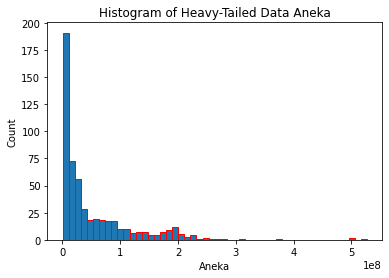

In [60]:
plt.hist(dataAneka, bins=50, ec='red')
plt.title("Histogram of Heavy-Tailed Data Aneka")
plt.xlabel("Aneka")
plt.ylabel("Count")
plt.show()

In [ ]:
!pip install openturns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52.3 MB 331 kB/s 


In [12]:
import numpy as np
from scipy.stats import genextreme

In [41]:
shape, loc, scale = genextreme.fit(dataAneka)
print("Fit parameters:")
print(f"  shape: {shape:.4f}")
print(f"  loc:   {loc:.4f}")
print(f"  scale: {scale:.4f}")
print()

Fit parameters:
  shape: -11.8909
  loc:   187503.2818
  scale: 39.0237



In [64]:
xx = np.linspace(dataAneka.min(), dataAneka.max(),535)
xx

array([1.87500000e+05, 1.17349247e+06, 2.15948494e+06, 3.14547740e+06,
       4.13146987e+06, 5.11746234e+06, 6.10345481e+06, 7.08944727e+06,
       8.07543974e+06, 9.06143221e+06, 1.00474247e+07, 1.10334171e+07,
       1.20194096e+07, 1.30054021e+07, 1.39913945e+07, 1.49773870e+07,
       1.59633795e+07, 1.69493720e+07, 1.79353644e+07, 1.89213569e+07,
       1.99073494e+07, 2.08933418e+07, 2.18793343e+07, 2.28653268e+07,
       2.38513192e+07, 2.48373117e+07, 2.58233042e+07, 2.68092966e+07,
       2.77952891e+07, 2.87812816e+07, 2.97672740e+07, 3.07532665e+07,
       3.17392590e+07, 3.27252514e+07, 3.37112439e+07, 3.46972364e+07,
       3.56832288e+07, 3.66692213e+07, 3.76552138e+07, 3.86412062e+07,
       3.96271987e+07, 4.06131912e+07, 4.15991836e+07, 4.25851761e+07,
       4.35711686e+07, 4.45571610e+07, 4.55431535e+07, 4.65291460e+07,
       4.75151385e+07, 4.85011309e+07, 4.94871234e+07, 5.04731159e+07,
       5.14591083e+07, 5.24451008e+07, 5.34310933e+07, 5.44170857e+07,
      

In [65]:
xx[534]

524735492.83453184

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


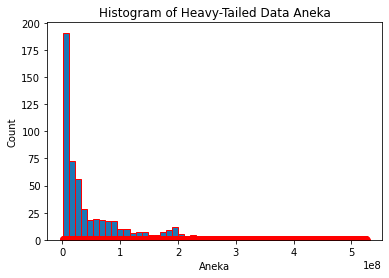

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genextreme
import math

plt.hist(dataAneka, bins=50, ec='red')
plt.title("Histogram of Heavy-Tailed Data Aneka")
plt.xlabel("Aneka")
plt.ylabel("Count")
#plt.show()



#xx = np.linspace(dataAneka.min(), dataAneka.max())

yy=[0 for x in range(535)]
for i in range(0,534):
  if xx[i]<loc:
    yy[i]=yy[i]+(math.exp(-(1)*(-1*((xx[i]-loc)/scale)**(1/shape))))
  else:
    yy[i]=yy[i]+1

#yy = genextreme.pdf(xx, shape, loc, scale)
plt.plot(xx, yy, 'ro')
plt.show()

In [59]:
yy

[nan,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0]